In [1]:
# load libraries
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import loadtxt
from numpy import sort
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [4]:
dataset = pd.read_csv('/home/ankita/Desktop/working_file/dir_15_07_2020_ml/1000_res+sus_iso_kmer_matrix_model.csv', chunksize=500, sep=",",low_memory=False,dtype="int8")

In [5]:
chunk_list = []  # append each chunk df here 

# Each chunk is in df format
for chunk in dataset:  
    # perform data filtering 
    #chunk_filter = do_preprocessing(chunk)
    
    # Once the data filtering is done, append the chunk to list
    #chunk_list.append(chunk_filter)
    chunk_list.append(chunk)
    
# concat the list into dataframe 
df_concat = pd.concat(chunk_list)

In [8]:
df_concat.info()
df_concat.shape
X = df_concat.iloc[:,1 :-1].values
y = df_concat.iloc[:, -1].values
print(len(X))
print(len(y))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 1809959 entries, AAAAAAAAAAAAAAAAAAACC to label
dtypes: int8(1809959)
memory usage: 3.4 GB
2000
2000


In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
print(len(X_train))
print(len(X_test))

1600
400


In [1]:
# fit a ensemble.AdaBoostClassifier() model to the data
model = XGBClassifier(learning_rate = 0.01,
                      n_estimators=100,max_depth=3,gamma=1,
                      subsample=0.8,colsample_bytree=0.8,)
model.fit(X_train, y_train)
print(); print(model)

NameError: name 'XGBClassifier' is not defined

In [9]:
# make predictions
expected_y  = y_test
predicted_y = model.predict(X_test)
predictions = [round(value) for value in predicted_y ]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 57.75%



XGBClassifier: 

              precision    recall  f1-score   support

           0       1.00      0.15      0.27       200
           1       0.54      1.00      0.70       200

    accuracy                           0.58       400
   macro avg       0.77      0.58      0.49       400
weighted avg       0.77      0.58      0.49       400


[[ 31 169]
 [  0 200]]


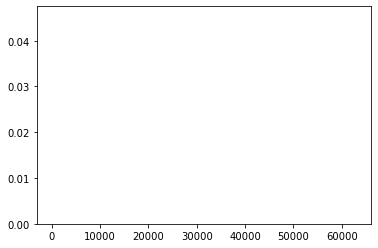

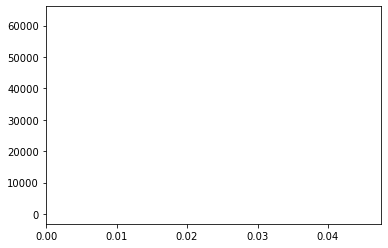

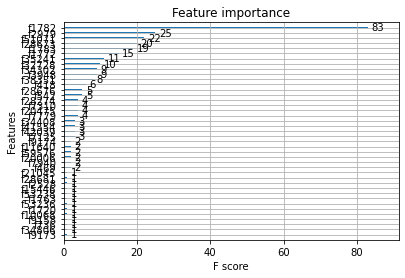

[0. 0. 0. ... 0. 0. 0.]


In [10]:
# summarize the fit of the model
print(); print('XGBClassifier: ')
print(); print(metrics.classification_report(expected_y, predicted_y))
print(); print(metrics.confusion_matrix(expected_y, predicted_y))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()
plt.barh(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()
plot_importance(model);     plt.show()
imp_fea=model.feature_importances_
print(imp_fea)

In [11]:
#k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator = model,X = X_train, y=y_train, cv =10)
accuracies.mean()
accuracies.std()

0.018802011195614147

In [12]:
#from sklearn.feature_selection import SelectFromModel
#Define the function and place the components.
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='green', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

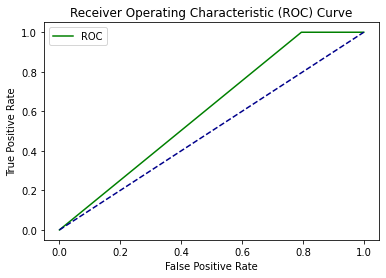

0.6024999999999999


In [13]:
#plot the ROC curve
probs = model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
auc=metrics.auc(fper, tper)
plot_roc_curve(fper, tper)
print(auc)

In [ ]:
np.save('important_feature.npy',imp_fea)